In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import requests
import statsmodels.formula.api as smf

In [2]:
Pressure_data= pd.read_csv(r"C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Data Science\time Series\case 2\pressure.csv")

In [4]:
type(Pressure_data.index)

pandas.core.indexes.range.RangeIndex

In [5]:
Pressure_data["MAIN_FILTER_IN_PRESSURE"].head()

0    10.338284
1     9.580143
2     9.377435
3     9.697717
4    10.220714
Name: MAIN_FILTER_IN_PRESSURE, dtype: float64

In [6]:
dates= pd.date_range(start="01/01/2018",periods=len(Pressure_data),freq="D")

In [7]:
Pressure_data.set_index(dates,inplace= True)

In [8]:
Pressure_data.head(10)

,Date,MAIN_FILTER_IN_PRESSURE
2018-01-01,1/1/2018,10.338284
2018-01-02,1/2/2018,9.580143
2018-01-03,1/3/2018,9.377435
2018-01-04,1/4/2018,9.697717
2018-01-05,1/5/2018,10.220714
2018-01-06,1/6/2018,9.499058
2018-01-07,1/7/2018,9.977460
2018-01-08,1/8/2018,9.417974
2018-01-09,1/9/2018,9.977460
2018-01-10,1/10/2018,9.940970


In [9]:
import calendar

In [10]:
Pressure_data['Month'] = dates.month
Pressure_data['Month'] = Pressure_data['Month'].apply(lambda x: calendar.month_abbr[x])
Pressure_data['Year'] = dates.year
Pressure_data["Day"] = dates.day
# print(Pressure_data["Month"])
# print(Pressure_data["Year"])
# print(Pressure_data["Date"])

In [11]:
# Pressure_data.drop(['Date'], axis=1, inplace=True)
Pressure_data.rename(columns={'MAIN_FILTER_IN_PRESSURE':'PRESSURE_IN_BOILER'}, inplace=True)
Pressure_data = Pressure_data[["Day",'Month', 'Year', 'PRESSURE_IN_BOILER']]

In [12]:
Pressure_data.head()

,Day,Month,Year,PRESSURE_IN_BOILER
2018-01-01,1,Jan,2018,10.338284
2018-01-02,2,Jan,2018,9.580143
2018-01-03,3,Jan,2018,9.377435
2018-01-04,4,Jan,2018,9.697717
2018-01-05,5,Jan,2018,10.220714


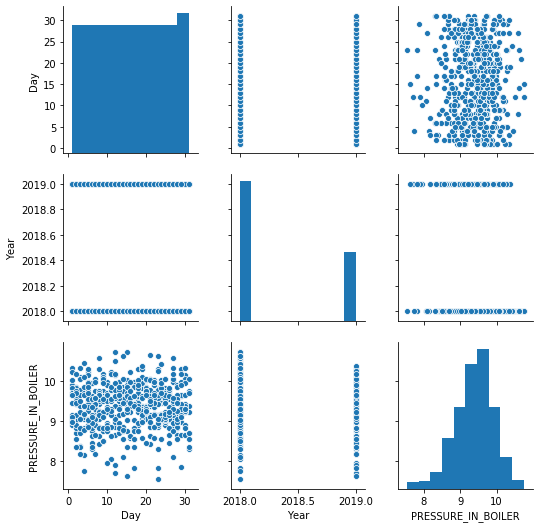

In [36]:
sns.pairplot(Pressure_data)

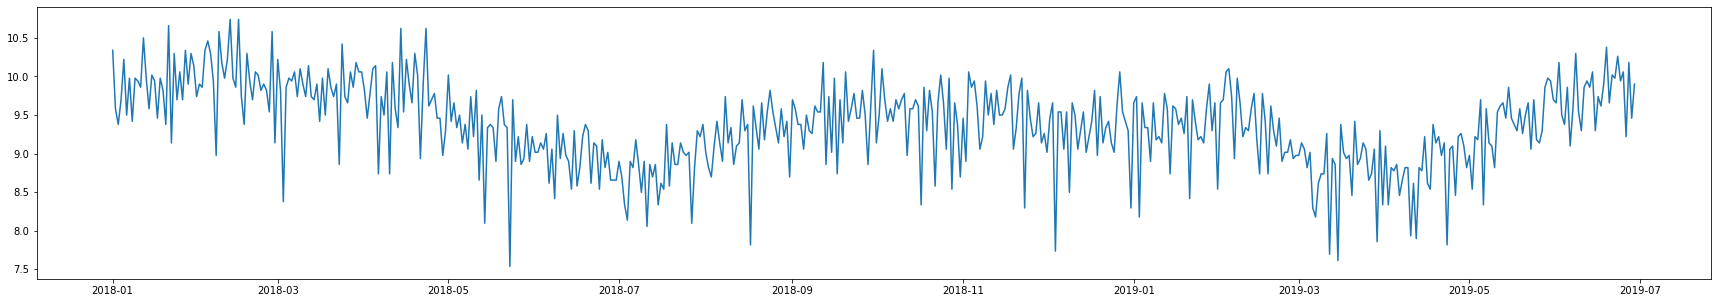

In [17]:
plt.figure(figsize=(30,5))
plt.plot(Pressure_data["PRESSURE_IN_BOILER"])
plt.show()

In [19]:
rol_mean= Pressure_data["PRESSURE_IN_BOILER"].rolling(window=7).mean()
rol_std= Pressure_data["PRESSURE_IN_BOILER"].rolling(window=7).std()

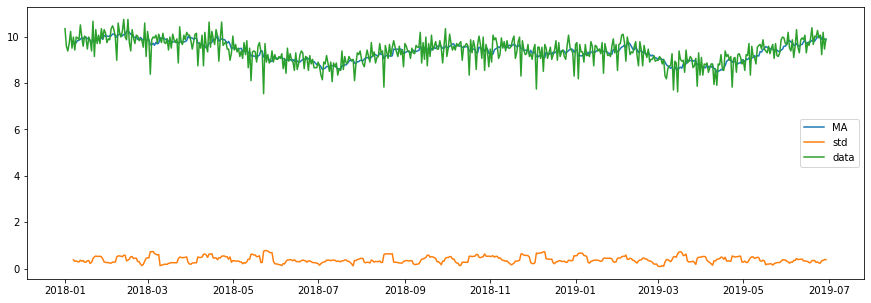

In [20]:
plt.figure(figsize=(15,5))
plt.plot(rol_mean, label= "MA")
plt.plot(rol_std, label= "std")
plt.plot(Pressure_data["PRESSURE_IN_BOILER"], label= "data")
plt.legend(loc="best")
plt.show()

In [21]:
monthly_pressure_data = pd.pivot_table(Pressure_data, values = "PRESSURE_IN_BOILER", columns = "Year", index = "Month")
monthly_pressure_data = monthly_pressure_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_pressure_data

Year,2018,2019
Month,,
Jan,9.887089,9.327867
Feb,9.999178,9.370483
Mar,9.825360,8.775445
Apr,9.705285,8.790786
May,9.230827,9.376910
Jun,8.954712,9.782996
Jul,8.804609,NaN
Aug,9.216572,NaN
Sep,9.502303,NaN


<AxesSubplot:xlabel='Month'>

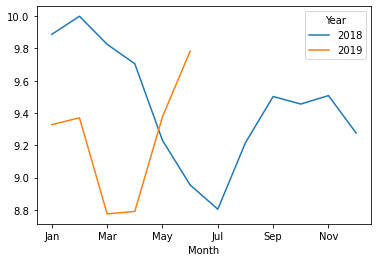

In [22]:
monthly_pressure_data.plot()

In [23]:
yearly_pressure_data = pd.pivot_table(Pressure_data, values = "PRESSURE_IN_BOILER", columns = "Month", index = "Year")
yearly_pressure_data.sort_index(axis=0)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2018,9.705285,9.216572,9.275816,9.999178,9.887089,8.804609,8.954712,9.825360,9.230827,9.507979,9.455509,9.502303
2019,8.790786,NaN,NaN,9.370483,9.327867,NaN,9.782996,8.775445,9.376910,NaN,NaN,NaN


<AxesSubplot:>

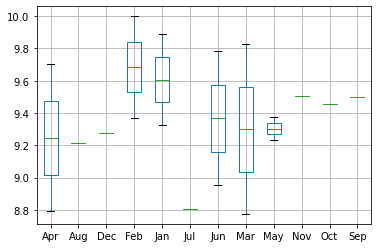

In [24]:
yearly_pressure_data.boxplot()

In [25]:
# we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data.
#On other hand, in the additive model
#,the magnitude of seasonality does not change in relation to time
decomposition= sm.tsa.seasonal_decompose(Pressure_data["PRESSURE_IN_BOILER"],model="multiplicative")

[]

<Figure size 720x432 with 0 Axes>

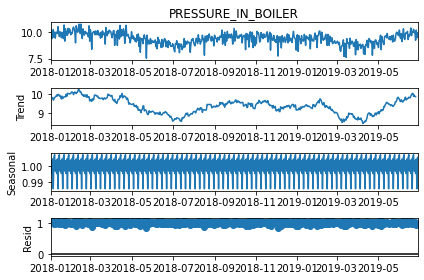

In [27]:
plt.figure(figsize=(10,6))
decomposition.plot()
plt.plot()

In [28]:
p= range(0,3)
d=range(0,3)
q=range(0,3)

In [41]:
for p_id in p:
    for d_id in d:
        for q_id in q:
            model= sm.tsa.statespace.SARIMAX(Pressure_data["PRESSURE_IN_BOILER"],
                                            order=(p_id,d_id,q_id),
                                            seasonal_order=(p_id,d_id,q_id,7),
                                            enforce_stationarity=False, enforce_invertibility=False)
            result =model.fit()
            print(p_id,d_id,q_id,result.aic)

0 0 0 3982.1960757992674
0 0 1 2780.4505943556383
0 0 2 2192.960742744628
0 1 0 1396.7617874880261
0 1 1 611.9523238712418
0 1 2 571.2937199043204
0 2 0 2591.165637304463
0 2 1 1397.8321532994441
0 2 2 655.501199436478
1 0 0 901.7066694831901
1 0 1 605.9051095392819


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 0 2 577.0398105424224
1 1 0 959.5392504067117
1 1 1 586.796191858632
1 1 2 573.5205140876067
1 2 0 1825.8588351991416
1 2 1 995.9843316109999


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 2 2 641.7301557223034
2 0 0 766.1190541679139


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 0 1 572.0711769639356


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 0 2 589.5811088678722
2 1 0 802.661950554869
2 1 1 580.2790681705507


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 1 2 577.131333187788
2 2 0 1459.8175236451398
2 2 1 844.4071572497396


C:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 2 648.9848166186601


In [42]:
model= sm.tsa.statespace.SARIMAX(Pressure_data["PRESSURE_IN_BOILER"],
                                            order=(0,1,2),
                                            seasonal_order=(0,1,2,7),
                                            enforce_stationarity=False, enforce_invertibility=False)
Final_result =model.fit()

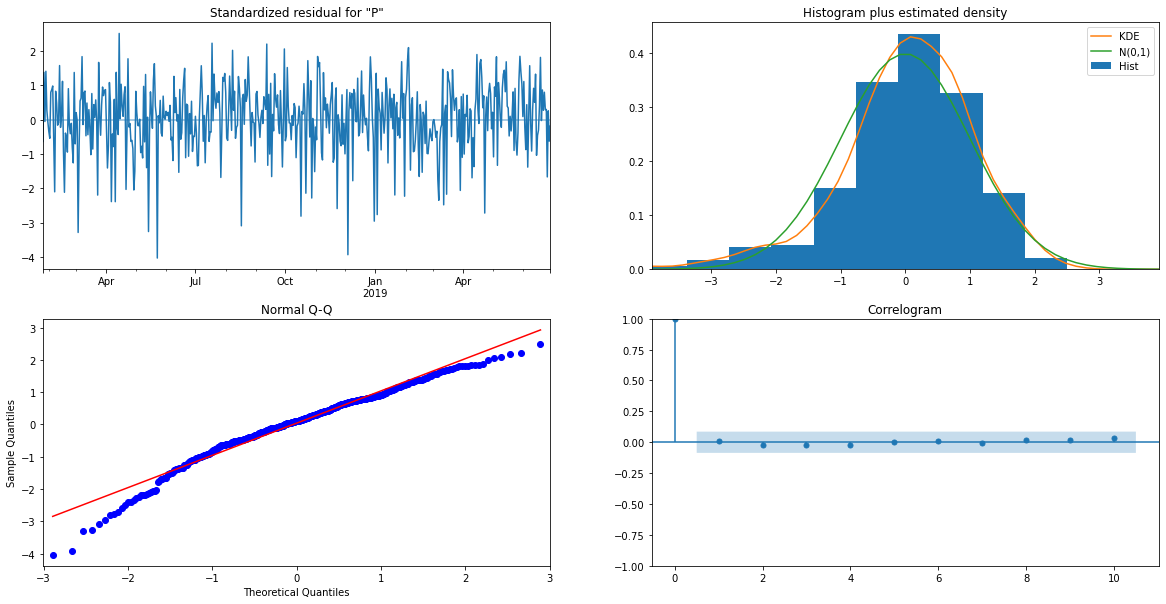

In [43]:
Final_result.plot_diagnostics(figsize=(20,10))
plt.show()

In [44]:
pred0 = Final_result.get_prediction(start='2018-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

In [45]:
pred1=Final_result.get_forecast("2019-12-01")
pred1_ci= pred1.conf_int()

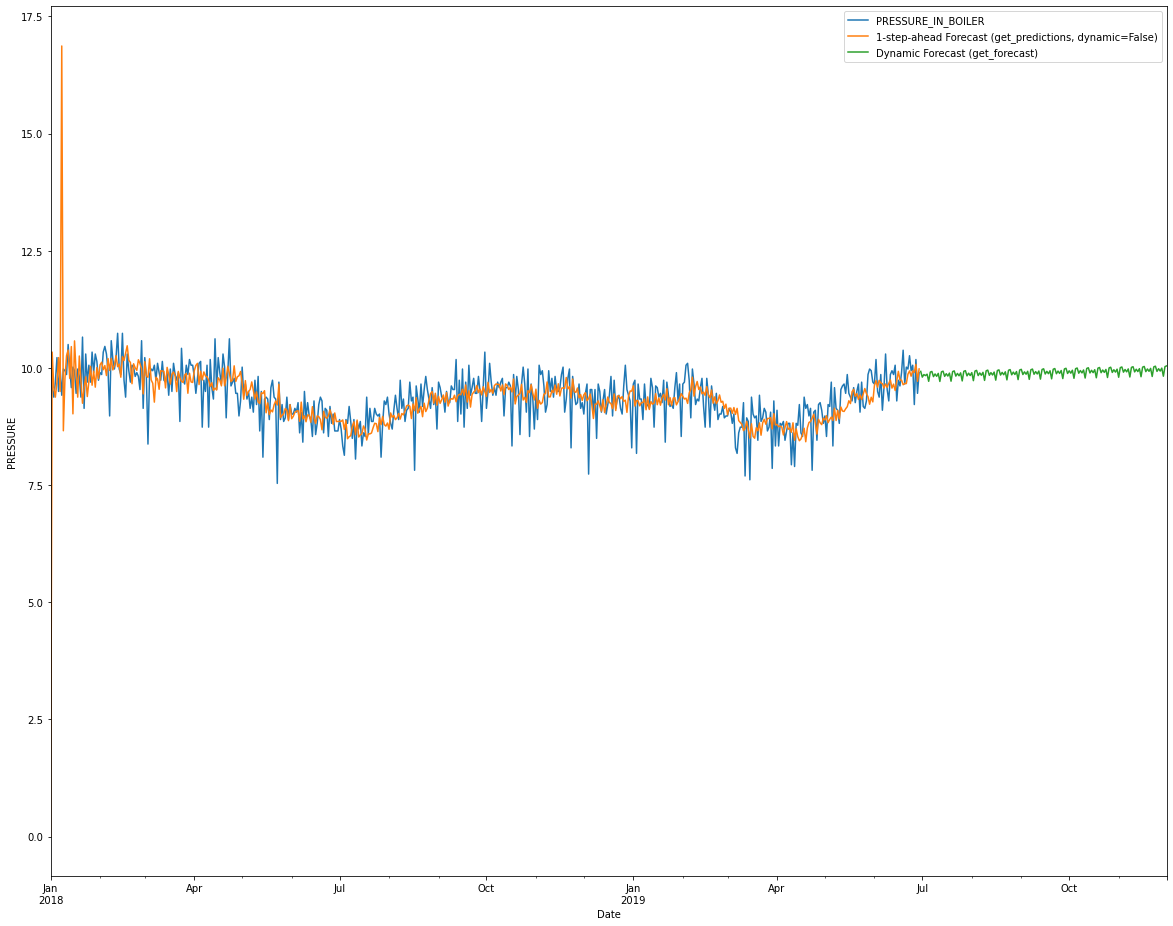

In [46]:
ax = Pressure_data["PRESSURE_IN_BOILER"].plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
plt.ylabel('PRESSURE')
plt.xlabel('Date')
plt.legend()
plt.show()

In [47]:
pred1_ci

,lower PRESSURE_IN_BOILER,upper PRESSURE_IN_BOILER
2019-06-30,9.126340,10.726995
2019-07-01,8.999653,10.609316
2019-07-02,9.046047,10.671740
2019-07-03,9.016548,10.658097
2019-07-04,9.038810,10.696090
...,...,...
2019-11-27,8.092179,11.775300
2019-11-28,8.148153,11.844625
2019-11-29,7.969091,11.678866
2019-11-30,8.167833,11.890865
